In [4]:
%matplotlib inline

In [224]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations

`m` is for money, in \$.    
`eta` is the production throughput, in \$/mass  



200.0 200.0 3.535533905932737
13.183821315317216
The solver successfully reached the end of the integration interval. 227


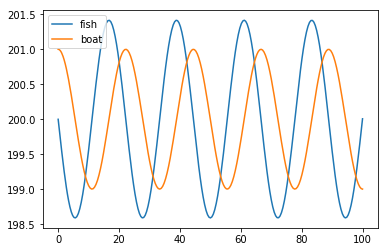

In [375]:
alpha = 0.4  # 1/s growth rate
beta = 0.002 # 1/B/s fishing rate
delta =  0.001 # 1/F/s boat growth rate
gamma = 0.2 # 1/s  decay rate

def dUdt(t, U):
    F, B = U
    
    dFdt = alpha*F  - beta*B*F
    dBdt = delta*B*F - gamma*B
    
    return (dFdt, dBdt)

print( alpha/beta, gamma/delta, 1/np.sqrt(alpha*gamma) )
print( (alpha/beta/np.exp(1))**alpha * (gamma/delta/np.exp(1))**gamma )

t_span = np.linspace(0, 200, 100)
U0 = (200, 201)

sol = solve_ivp(dUdt, [0, 100], U0, method='BDF', rtol=1e-8)
print(sol.message, len(sol.t))

plt.plot(sol.t, sol.y[0, :], label='fish');
plt.plot(sol.t, sol.y[1, :], label='boat');
plt.legend();

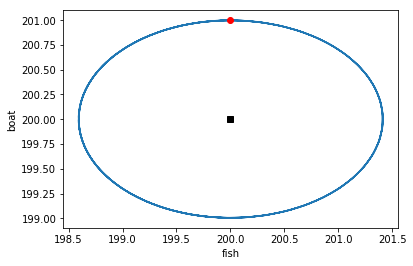

In [374]:
plt.plot(sol.y[0, :], sol.y[1, :], label='boat');
plt.plot(sol.y[0, 0], sol.y[1, 0], 'or');
plt.plot( alpha/beta, gamma/delta, 'sk' )
plt.xlabel('fish'); plt.ylabel('boat');

100.0 500.0 3.162277660168379
27.891949154323548
The solver successfully reached the end of the integration interval. 122


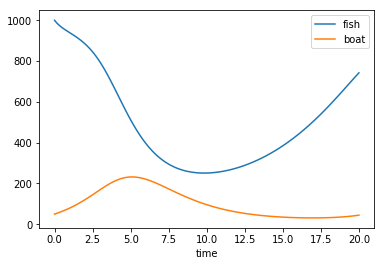

In [441]:
alpha = 0.2  # 1/s growth rate
beta = 0.002 # 1/B/s fishing rate
delta =  0.001 # 1/F/s boat growth rate
gamma = 0.5 # 1/s  decay rate
K = 1000

def dUdt(t, U):
    F, B = U
    
    k = 1 - 2/(1 + np.exp(-(F/K-1)/0.05)) 
    
    dFdt = alpha*k*F  - beta*B*F
    dBdt = delta*B*F - gamma*B
    
    return (dFdt, dBdt)

print( alpha/beta, gamma/delta, 1/np.sqrt(alpha*gamma) )
print( (alpha/beta/np.exp(1))**alpha * (gamma/delta/np.exp(1))**gamma )


U0 = (1000, 50)

sol = solve_ivp(dUdt, [0, 20], U0, method='BDF', rtol=1e-6)
print(sol.message, len(sol.t))

plt.plot(sol.t, sol.y[0, :], label='fish');
plt.plot(sol.t, sol.y[1, :], label='boat');
plt.xlabel('time')
plt.legend();

Text(0,0.5,'alpha / alpha0')

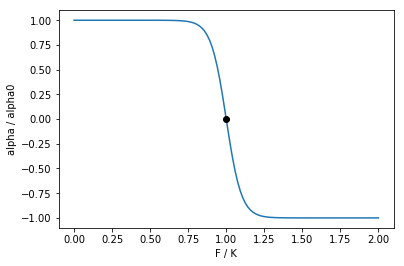

In [432]:
x = np.linspace(0, 2, 120)
y = 1 - 2/(1 + np.exp(-(x-1)/0.05)) 
plt.plot(x, y); plt.plot(1, 0, 'ok');
plt.xlabel('F / K');plt.ylabel('alpha / alpha0')

In [471]:
def dUdt(U, t, percent_in_prod):
    stuff, margin = U
    percent_in_prod = percent_in_prod(t)
    eta_invest = 0.1 # mass/s2/$  R&D eff.
    
    dstuff_dt = stuff*percent_in_prod*margin - stuff*(1-percent_in_prod)
    dmargin_dt = (1-percent_in_prod)*eta_invest # stuff
    
    return (dstuff_dt, dmargin_dt)

In [1010]:
class Ocean():
    
    def __init__(self):
        self.B = 1
        self.F = 100000
        self.K = 100000
        self.alpha_zero = 0.02
        self.beta = 10  # fish per tick per boat
        
        self.surplus = 0
        
    def _tick(self, verbose=False):
        fishing_total_capacity = self.B * self.beta
        ratio = self.F/self.K
        fished_quantity = np.ceil( fishing_total_capacity * ratio )
        
        growth = np.floor( self.alpha(self.F)*self.F )
        
        self.F = self.F + growth - fished_quantity
        self.surplus += fished_quantity

        if verbose:
            print('fished:', fished_quantity, 'manque', fishing_total_capacity-fished_quantity,
                  'growth:', growth, 'F:', self.F)
            print('surplus:', self.surplus)
            
            
    def tick(self, N=1):
        for _ in range(N-1):
            self._tick()
            
        self._tick(verbose=True)
    

        
        
    def alpha(self, F):
        ratio = F/self.K
        return self.alpha_zero *( 1 - 2/(1 + np.exp(-(ratio-1)/0.05)) )
    
    def buy_boat(self, N=1):
        self.B += N
        print('nbr boat:', self.B)

In [1011]:
O = Ocean()

In [1016]:
O.tick(1000)

fished: 1041.0 manque 69.0 growth: 1041.0 F: 93740.0
surplus: 2092440.0


In [1014]:
O.buy_boat(100)

nbr boat: 111
